## *Importing python libraries*

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

## *Data collection*

In [3]:
# loading the dataset into a pandas dataframe
df = pd.read_csv('Insurance.csv')

In [4]:
# print first 5 rows of the dataframe
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [5]:
# print last 5 rows of the dataframe
df.tail()

,age,sex,bmi,children,smoker,region,expenses
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95
1337,61,female,29.1,0,yes,northwest,29141.36


In [6]:
# number of rows and columns
df.shape

(1338, 7)

In [7]:
# List of Columns
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'expenses'], dtype='object')

In [8]:
# Data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


## *Data cleaning*

In [9]:
# checking any missing values in data
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

#### *There are no null values in the data set*

In [10]:
df_dup = df.duplicated().any()
print(df_dup)

True


In [11]:
# Duplicated Values
df[df.duplicated()]

,age,sex,bmi,children,smoker,region,expenses
581,19,male,30.6,0,no,northwest,1639.56


In [12]:
# Removing the duplicated values
df = df.drop_duplicates()

#### *There is only one duplicated row.*

In [13]:
# number of rows and columns
df.shape

(1337, 7)

In [14]:
# checking the data type is correct for each feature
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
expenses    float64
dtype: object

### *Checking for Missing Values*

In [15]:
df.isnull().any()

age         False
sex         False
bmi         False
children    False
smoker      False
region      False
expenses    False
dtype: bool

In [16]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

#### *Each feature are correctly aligned to their types.*

In [17]:
# statistical measures of the dataset
df.describe()

,age,bmi,children,expenses
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.665520,1.095737,13279.121638
std,14.044333,6.100664,1.205571,12110.359657
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4746.340000
50%,39.000000,30.400000,1.000000,9386.160000
75%,51.000000,34.700000,2.000000,16657.720000
max,64.000000,53.100000,5.000000,63770.430000


In [18]:
# Statistical measures of the categorical features
df.describe(exclude = "number")

,sex,smoker,region
count,1337,1337,1337
unique,2,2,4
top,male,no,southeast
freq,675,1063,364


## *Exploratory data analysis*

### *Categorical features*

#### *1. sex*

In [19]:
# finding unique values in sex feature
df["sex"].unique()

array(['female', 'male'], dtype=object)

In [20]:
# number of each demographic in sex feature
df["sex"].value_counts()

sex
male      675
female    662
Name: count, dtype: int64

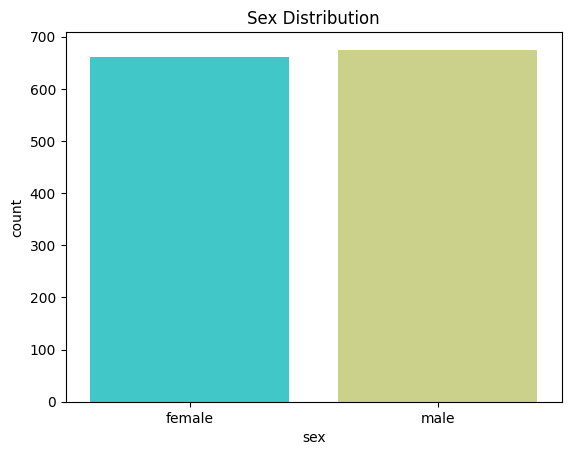

In [21]:
# plotting sex distribution
sns.countplot(x = "sex",data =df,hue = "sex",palette = "rainbow")
plt.title("Sex Distribution")
plt.show()

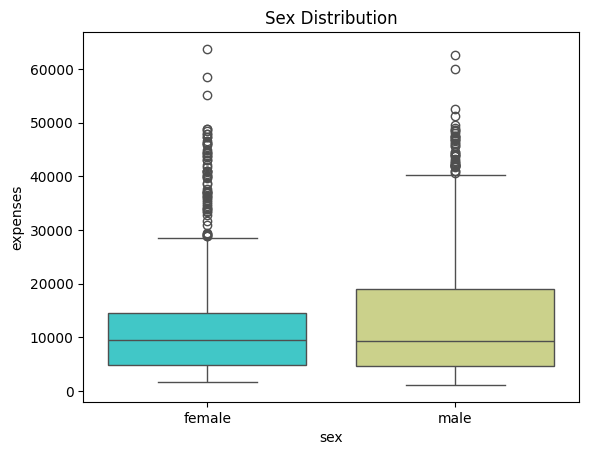

In [22]:
# comparing medians 
sns.boxplot(x = "sex",y="expenses",data = df,hue = "sex",palette = "rainbow")
plt.title("Sex Distribution")
plt.show()

#### *Male and female demographics are similar and their insurance expenses are similar. Outliers are in both demographics.*

#### *2. smoker*

In [23]:
# finding unique values in smoker feature
df["smoker"].unique()

array(['yes', 'no'], dtype=object)

In [24]:
# number of each demographic in smoker feature
df["smoker"].value_counts()

smoker
no     1063
yes     274
Name: count, dtype: int64

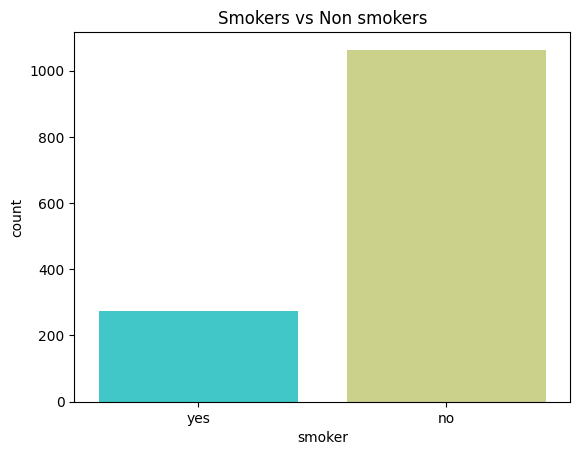

In [25]:
# plotting countplot of smoker feature
sns.countplot(x="smoker",data =df,hue = "smoker",palette = "rainbow")
plt.title("Smokers vs Non smokers")
plt.show()

#### *Number of smokers is less than non smokers.*

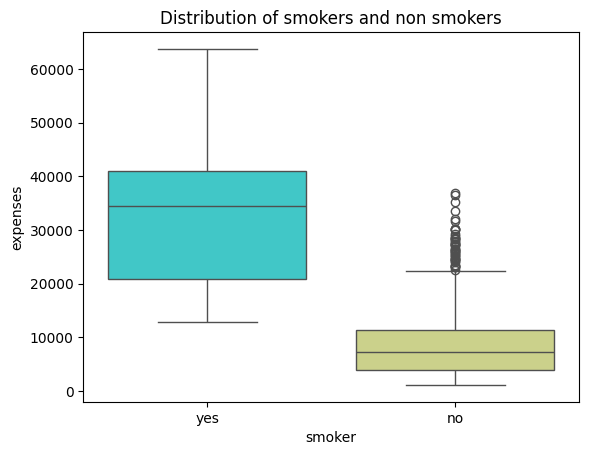

In [26]:
sns.boxplot(x = "smoker",y="expenses",data = df,hue = "smoker",palette = "rainbow")
plt.title("Distribution of smokers and non smokers")
plt.show()

#### *There is significant increase in insurance for smokers than non smokers. There are only outliers in non smokers and no outliers in smokers.*

#### *3. region*

In [27]:
df["region"].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [28]:
df["region"].value_counts()

region
southeast    364
southwest    325
northwest    324
northeast    324
Name: count, dtype: int64

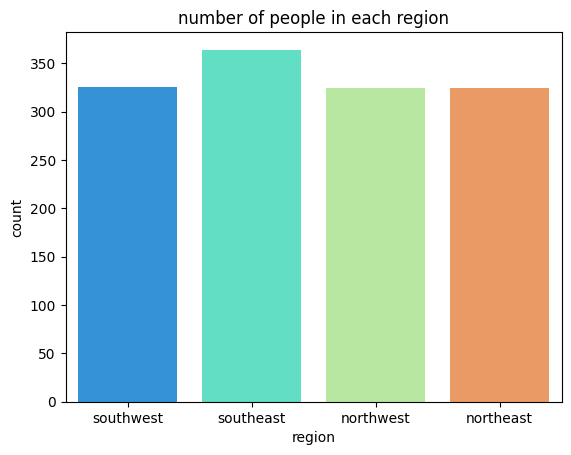

In [29]:
sns.countplot(x="region",data =df,hue = "region",palette = "rainbow")
plt.title("number of people in each region")
plt.show()

#### *People from south east region are slightly greater than other regions.*

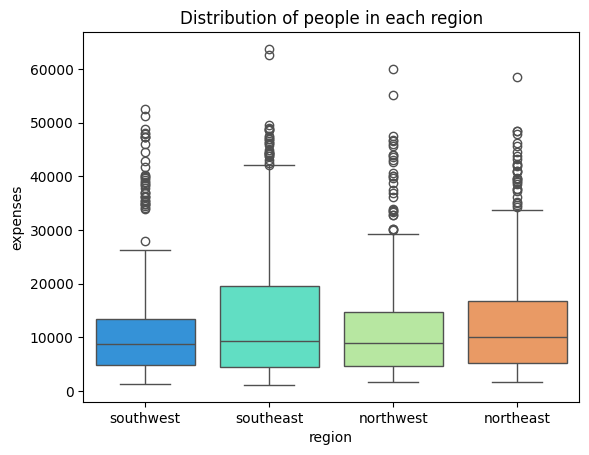

In [30]:
sns.boxplot(x = "region",y="expenses",data = df,hue = "region",palette = "rainbow")
plt.title("Distribution of people in each region")
plt.show()

### *Numerical features*

In [31]:
df.describe()

,age,bmi,children,expenses
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.665520,1.095737,13279.121638
std,14.044333,6.100664,1.205571,12110.359657
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4746.340000
50%,39.000000,30.400000,1.000000,9386.160000
75%,51.000000,34.700000,2.000000,16657.720000
max,64.000000,53.100000,5.000000,63770.430000


#### *4. age*

In [32]:
df["age"].unique()

array([19, 18, 28, 33, 32, 31, 46, 37, 60, 25, 62, 23, 56, 27, 52, 30, 34,
       59, 63, 55, 22, 26, 35, 24, 41, 38, 36, 21, 48, 40, 58, 53, 43, 64,
       20, 61, 44, 57, 29, 45, 54, 49, 47, 51, 42, 50, 39], dtype=int64)

<Figure size 600x600 with 0 Axes>

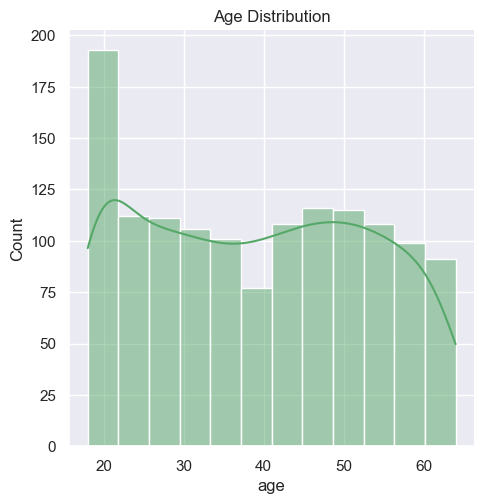

In [33]:
# Distribution of age feature
sns.set()
plt.figure(figsize=(6,6))
sns.displot(df["age"],color = 'g',kde = True)
plt.title("Age Distribution")
plt.show()

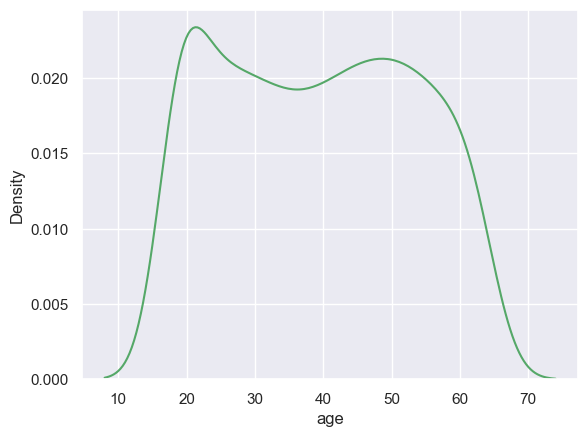

In [34]:
sns.kdeplot(df["age"],color = "g")
plt.show()

<Axes: xlabel='age'>

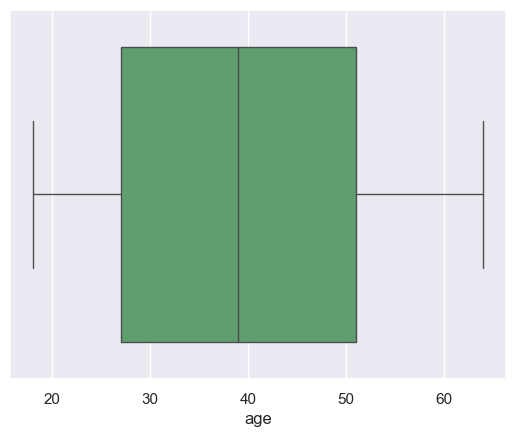

In [35]:
sns.boxplot(x="age",data =df,color ="g" )

#### *5. bmi*

In [36]:
df["bmi"].unique()

array([27.9, 33.8, 33. , 22.7, 28.9, 25.7, 33.4, 27.7, 29.8, 25.8, 26.2,
       26.3, 34.4, 39.8, 42.1, 24.6, 30.8, 23.8, 40.3, 35.3, 36. , 32.4,
       34.1, 31.9, 28. , 23.1, 32.8, 17.4, 36.3, 35.6, 28.6, 28.3, 36.4,
       20.4, 20.8, 36.7, 39.9, 26.6, 36.6, 21.8, 37.1, 37.3, 38.7, 34.8,
       24.5, 35.2, 33.6, 28.7, 37. , 31.8, 31.7, 22.9, 27.4, 33.7, 24.7,
       25.9, 22.4, 39.1, 36.2, 24. , 24.8, 28.5, 28.1, 32. , 34. , 29.6,
       35.5, 26.9, 38.3, 37.6, 41.2, 31.2, 27.2, 27. , 39.5, 31.3, 20. ,
       19.3, 31.6, 25.5, 30.1, 29.9, 27.5, 28.4, 30.9, 35.1, 29.7, 35.7,
       32.2, 49.1, 23.4, 29. , 31.4, 33.9, 28.8, 37.4, 17.8, 34.7, 26.5,
       22. , 35.9, 25.6, 25.2, 32.5, 25.3, 38.8, 30.5, 37.7, 24.1, 24.4,
       27.8, 36.9, 39.6, 28.2, 33.2, 18.9, 41.5, 30.3, 16. , 33.3, 29.2,
       26.4, 30.7, 41.9, 32.1, 30.6, 18.1, 39.3, 36.1, 22.3, 26.7, 23.2,
       38.1, 22.2, 38.4, 29.1, 22.1, 26.8, 30. , 20.9, 17.3, 34.2, 25.4,
       40.2, 24.3, 42.4, 19.8, 30.2, 29.4, 27.6, 20

<Figure size 600x600 with 0 Axes>

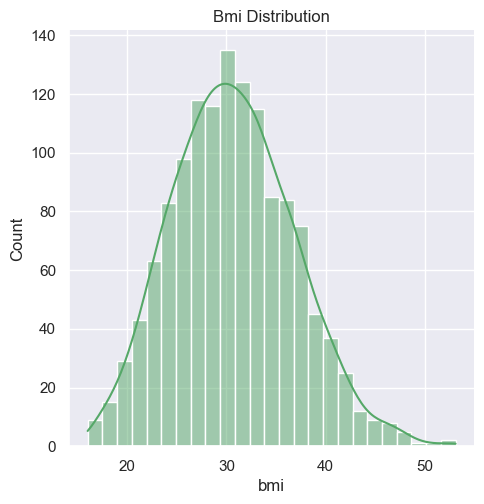

In [37]:
# Distribution of bmi feature
plt.figure(figsize=(6,6))
sns.displot(df["bmi"],color = "g",kde = True)
plt.title("Bmi Distribution")
plt.show()

#### *Normal bmi range --> 18.5 to 24.9*

<Axes: xlabel='bmi', ylabel='Density'>

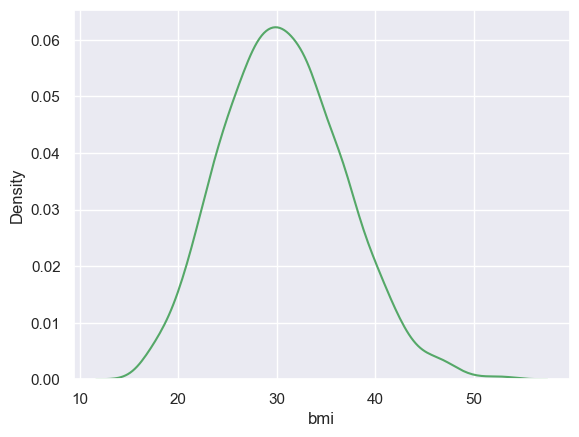

In [38]:
sns.kdeplot(df["bmi"],color="g")

<Axes: xlabel='bmi'>

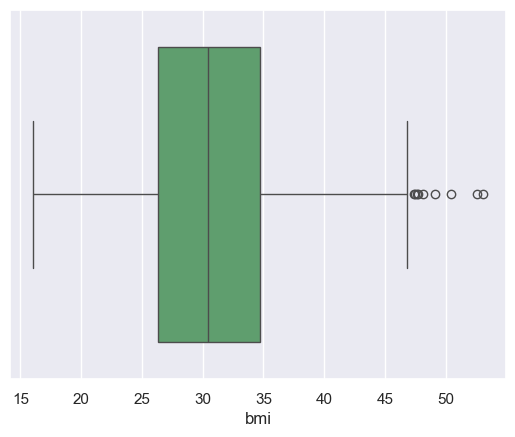

In [39]:
sns.boxplot(x="bmi",data = df,color="g")

#### *6. children*

#### *Even though children feature is numerical feature , the unique values are less can be treated as categorical feature.*

In [40]:
df["children"].unique()

array([0, 1, 3, 2, 5, 4], dtype=int64)

In [41]:
df["children"].value_counts()

children
0    573
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64

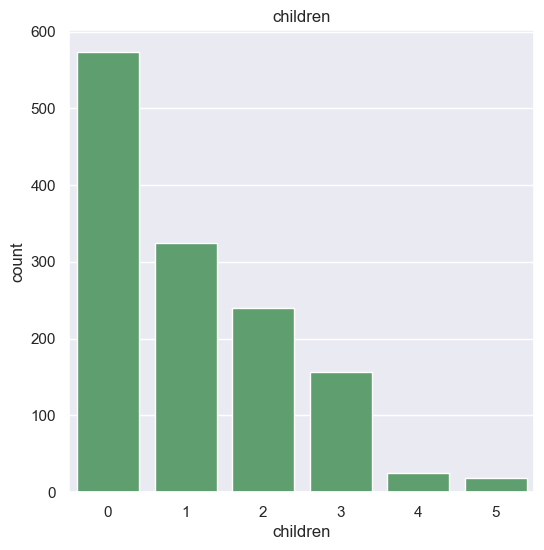

In [42]:
plt.figure(figsize=(6,6))
sns.countplot(x="children",data = df,color="g")
plt.title("children")
plt.show()

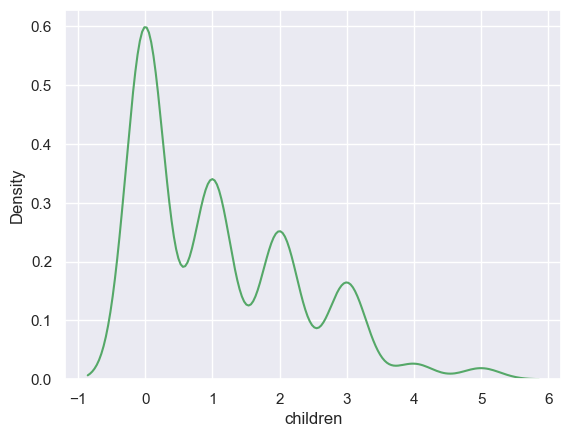

In [43]:
sns.kdeplot(df["children"],color="g")
plt.show()

### *expenses*

In [44]:
df["expenses"].unique()

array([16884.92,  1725.55,  4449.46, ...,  1629.83,  2007.95, 29141.36])

<Figure size 600x600 with 0 Axes>

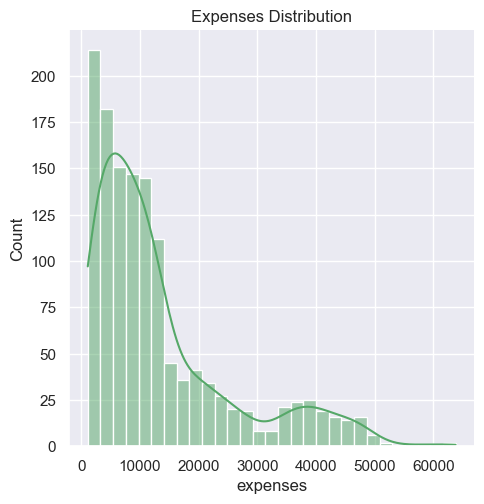

In [45]:
# distribution of charges
plt.figure(figsize=(6,6))
sns.displot(df["expenses"],color="g",kde=True)
plt.title("Expenses Distribution")
plt.show()

In [46]:
# Finding the expenses for each age group
a = df.groupby("age")["expenses"].max()
a

age
18    38792.69
19    39722.75
20    38344.57
21    26018.95
22    44501.40
23    40904.20
24    38126.25
25    42112.24
26    36085.22
27    39611.76
28    51194.56
29    44585.46
30    40932.43
31    58571.07
32    37607.53
33    55135.40
34    43943.88
35    39983.43
36    43753.34
37    46113.51
38    41949.24
39    40103.89
40    40003.33
41    40273.65
42    43896.38
43    45863.21
44    48885.14
45    62592.87
46    46151.12
47    44202.65
48    45702.02
49    39727.61
50    42856.84
51    47462.89
52    60021.40
53    46661.44
54    63770.43
55    44423.80
56    43921.18
57    48675.52
58    47496.49
59    48970.25
60    52590.83
61    48517.56
62    46718.16
63    48824.45
64    49577.66
Name: expenses, dtype: float64

In [47]:
# Finding the maximum insurance expense for which age group.
df.loc[df["expenses"] == df["expenses"].max(),'age']

543    54
Name: age, dtype: int64

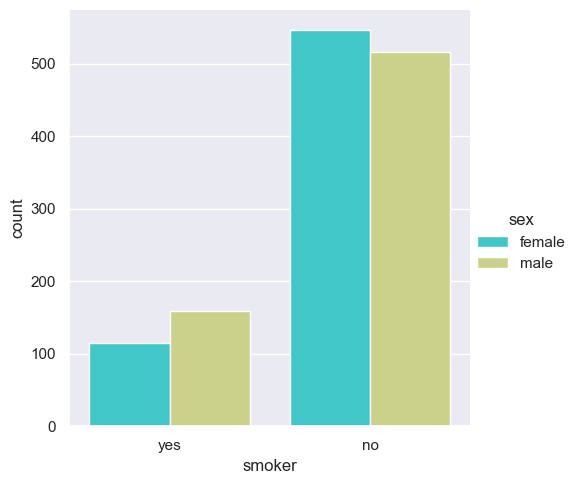

In [48]:
# Plotting smoker feature with respect to sex feature
sns.catplot(x="smoker",kind= 'count',hue="sex",data = df,palette ="rainbow")

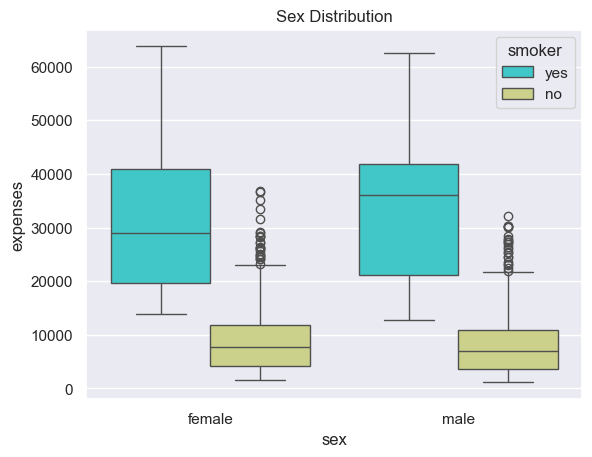

In [49]:
# Smokers and sex difference in insurance
sns.boxplot(x = "sex",y="expenses",data = df,hue = "smoker",palette = "rainbow")
plt.title("Sex Distribution")
plt.show()

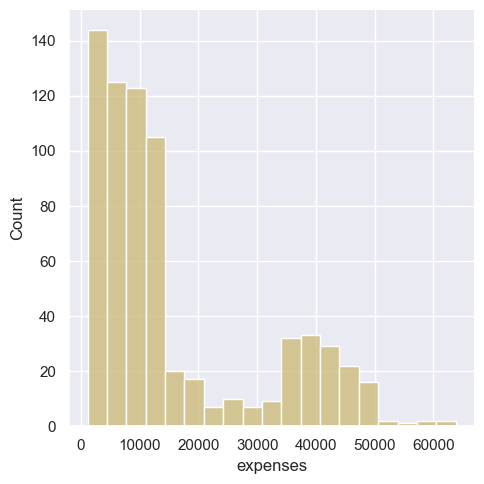

In [50]:
# Checking whether the obese people are paying more or not
sns.displot(df[(df.bmi>=30)]['expenses'],color="y")

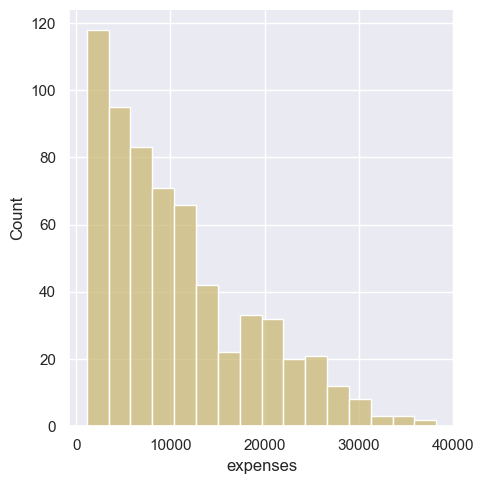

In [51]:
sns.displot(df[(df.bmi<30)]['expenses'],color="y")

### *Obese people are paying more than non obese people.*

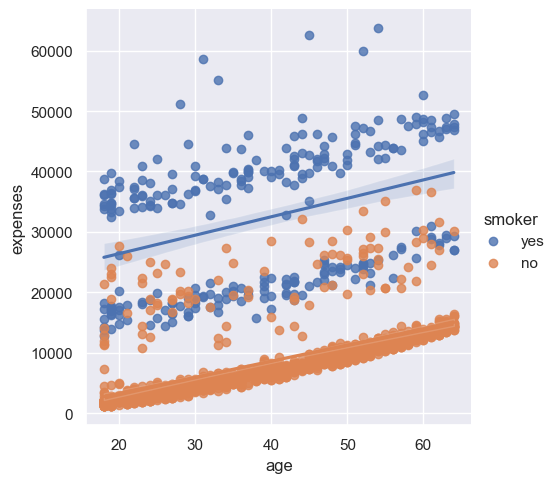

In [52]:
# Checking whether expenses are increasing for increase in age.
sns.lmplot(x="age",y="expenses",hue = "smoker",data = df)

## *Data Preprocessing*

In [53]:
# Getting all features in dataset which are categorical.
categorical_features = [features for features in df.columns if df[features].dtypes == "object"]
categorical_features

['sex', 'smoker', 'region']

### *Encoding the categorical features*

In [54]:
# encoding sex feature
df.replace({'sex':{'female':0,'male':1}},inplace = True)

# encoding smoker feature
df.replace({'smoker':{'no':0,'yes':1}},inplace = True)

# encoding region feature
df.replace({'region':{'southeast':0,'southwest':1,'northeast':2,'northwest':3}},inplace = True)

In [55]:
df

,age,sex,bmi,children,smoker,region,expenses
0,19,0,27.9,0,1,1,16884.92
1,18,1,33.8,1,0,0,1725.55
2,28,1,33.0,3,0,0,4449.46
3,33,1,22.7,0,0,3,21984.47
4,32,1,28.9,0,0,3,3866.86
...,...,...,...,...,...,...,...
1333,50,1,31.0,3,0,3,10600.55
1334,18,0,31.9,0,0,2,2205.98
1335,18,0,36.9,0,0,0,1629.83
1336,21,0,25.8,0,0,1,2007.95


<Axes: >

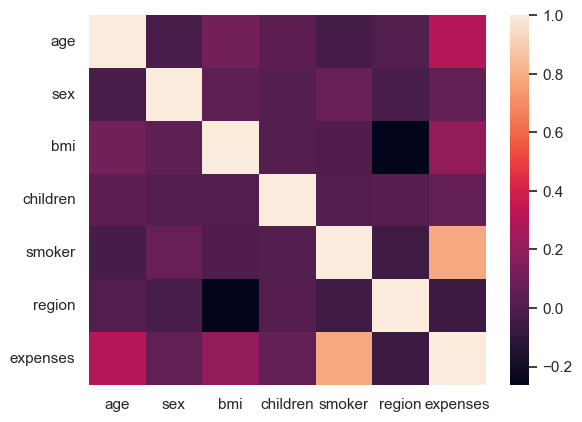

In [56]:
# Plotting heatmap for correlation matrix
sns.heatmap(df.corr())

In [57]:
# Checking the correlation with respect to expenses
df.corr()["expenses"].sort_values()

region     -0.056070
sex         0.058045
children    0.067389
bmi         0.198637
age         0.298308
smoker      0.787234
expenses    1.000000
Name: expenses, dtype: float64

### *Principal Component Analysis*

In [58]:
from sklearn.feature_selection import VarianceThreshold
var_thres = VarianceThreshold(threshold = 0)
var_thres.fit(df)

VarianceThreshold(threshold=0)

In [59]:
# Checking the features have more correlation than 0.
var_thres.get_support()

array([ True,  True,  True,  True,  True,  True,  True])

In [60]:
# But features such as region, sex and children has very less correlation with expenses.
df1 = df.loc[:,["age","bmi","smoker","expenses"]]
df1.head()

,age,bmi,smoker,expenses
0,19,27.9,1,16884.92
1,18,33.8,0,1725.55
2,28,33.0,0,4449.46
3,33,22.7,0,21984.47
4,32,28.9,0,3866.86


### *Splitting train test sets*

In [61]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

In [62]:
# Splitting features and target
X = df1.drop(columns ="expenses",axis =1)
Y = df1["expenses"]

In [63]:
print(X)

      age   bmi  smoker
0      19  27.9       1
1      18  33.8       0
2      28  33.0       0
3      33  22.7       0
4      32  28.9       0
...   ...   ...     ...
1333   50  31.0       0
1334   18  31.9       0
1335   18  36.9       0
1336   21  25.8       0
1337   61  29.1       1

[1337 rows x 3 columns]


In [64]:
print(Y)

0       16884.92
1        1725.55
2        4449.46
3       21984.47
4        3866.86
          ...   
1333    10600.55
1334     2205.98
1335     1629.83
1336     2007.95
1337    29141.36
Name: expenses, Length: 1337, dtype: float64


#### *Splitting the data into Training data and Testing data.*

In [65]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2,random_state =1)

In [66]:
print(X.shape,X_train.shape,X_test.shape)

(1337, 3) (1069, 3) (268, 3)


In [67]:
print(Y.shape,Y_train.shape,Y_test.shape)

(1337,) (1069,) (268,)


In [68]:
# Data is standardazation for features
X_train = StandardScaler().fit_transform(X_train)
X_test = StandardScaler().fit_transform(X_test)

## *Model Training*

In [69]:
# Importing metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [70]:
# importing models
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

In [71]:
# Model training
lr = LinearRegression()
lr.fit(X_train,Y_train)
knn = KNeighborsRegressor(n_neighbors = 5)
knn.fit(X_train,Y_train)
dtr = DecisionTreeRegressor()
dtr.fit(X_train,Y_train)
rf = RandomForestRegressor()
rf.fit(X_train,Y_train)
xgb = XGBRegressor()
xgb.fit(X_train,Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [72]:
lr_y_pred = lr.predict(X_test)
knn_y_pred = knn.predict(X_test)
dtr_y_pred = dtr.predict(X_test)
rf_y_pred = rf.predict(X_test)
xgb_y_pred = xgb.predict(X_test)

### *Linear Regression*

In [73]:
lr_score = r2_score(Y_test, lr_y_pred)
lr_mae = mean_absolute_error(Y_test, lr_y_pred)

In [74]:
print("Linear Regression Training score: {:.2f}".format(lr.score(X_train, Y_train)))
print("Linear Regression Test score: {:.2f}".format(lr.score(X_test, Y_test)))
print("R2 score: {:.2f}".format(r2_score(Y_test, lr_y_pred)))
print("MSE: {:.2f}".format(mean_squared_error(Y_test, lr_y_pred)))
print("MAE: {:.2f}".format(mean_absolute_error(Y_test, lr_y_pred)))

Linear Regression Training score: 0.74
Linear Regression Test score: 0.73
R2 score: 0.73
MSE: 34435031.64
MAE: 4006.99


In [75]:
lr_prediction = pd.DataFrame({'actual':Y_test, 'predicted':lr_y_pred.flatten()})

In [76]:
lr_prediction.head()

,actual,predicted
629,42983.46,41548.532127
1087,11353.23,14361.871437
283,11879.10,14155.643341
790,5662.23,13246.538583
594,5709.16,13250.752130


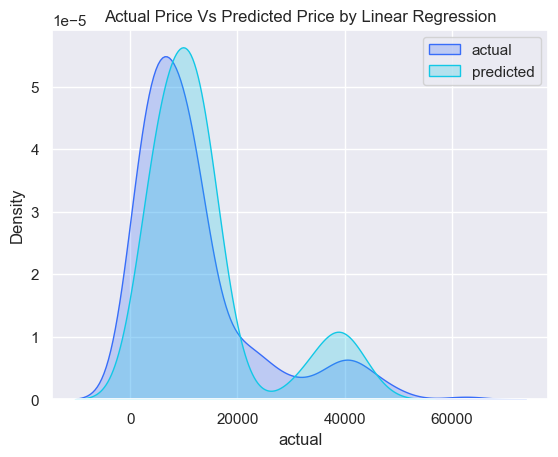

In [77]:
sns.set_palette('rainbow')
sns.kdeplot(data=lr_prediction, x='actual', label='actual', fill=True)
sns.kdeplot(data=lr_prediction, x='predicted', label='predicted', fill=True)
plt.title("Actual Price Vs Predicted Price by Linear Regression")
plt.legend()
plt.show()

### *K Neighbors Regression*

In [78]:
knn_score = r2_score(Y_test, knn_y_pred)
knn_mae = mean_absolute_error(Y_test, knn_y_pred)

In [79]:
print("K Nighbors Regressor Training score: {:.2f}".format(knn.score(X_train, Y_train)))
print("K Nighbors Regressor Test score: {:.2f}".format(knn.score(X_test, Y_test)))
print("R2 score: {:.2f}".format(r2_score(Y_test, knn_y_pred)))
print("MSE: {:.2f}".format(mean_squared_error(Y_test, knn_y_pred)))
print("MAE: {:.2f}".format(mean_absolute_error(Y_test, knn_y_pred)))

K Nighbors Regressor Training score: 0.88
K Nighbors Regressor Test score: 0.83
R2 score: 0.83
MSE: 22631788.43
MAE: 2712.94


In [80]:
knn_prediction = pd.DataFrame({'actual':Y_test, 'predicted':knn_y_pred.flatten()})

In [81]:
knn_prediction.head()

,actual,predicted
629,42983.46,44188.532
1087,11353.23,11843.120
283,11879.10,13966.686
790,5662.23,10460.026
594,5709.16,6361.472


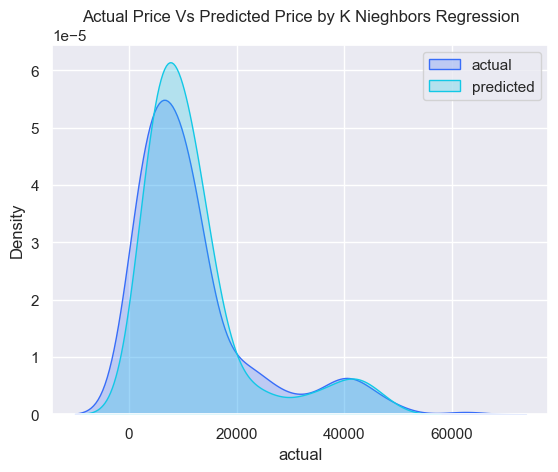

In [82]:
sns.set_palette('rainbow')
sns.kdeplot(data=knn_prediction, x='actual', label='actual', fill=True)
sns.kdeplot(data=knn_prediction, x='predicted', label='predicted', fill=True)
plt.title("Actual Price Vs Predicted Price by K Nieghbors Regression")
plt.legend()
plt.show()

### *Decision Tree Regression*

In [83]:
dtr_score = r2_score(Y_test, dtr_y_pred)
dtr_mae = mean_absolute_error(Y_test, dtr_y_pred)

In [84]:
print("Decision Tree Regressor Training score: {:.2f}".format(dtr.score(X_train, Y_train)))
print("Decision Tree RegressorTest score: {:.2f}".format(dtr.score(X_test, Y_test)))
print("R2 score: {:.2f}".format(r2_score(Y_test, dtr_y_pred)))
print("MSE: {:.2f}".format(mean_squared_error(Y_test, dtr_y_pred)))
print("MAE: {:.2f}".format(mean_absolute_error(Y_test, dtr_y_pred)))

Decision Tree Regressor Training score: 0.99
Decision Tree RegressorTest score: 0.75
R2 score: 0.75
MSE: 32484828.43
MAE: 2844.27


In [85]:
dtr_prediction = pd.DataFrame({'actual':Y_test, 'predicted':dtr_y_pred.flatten()})

In [86]:
dtr_prediction.head()

,actual,predicted
629,42983.46,48885.14
1087,11353.23,11842.62
283,11879.10,19125.79
790,5662.23,6373.56
594,5709.16,6474.01


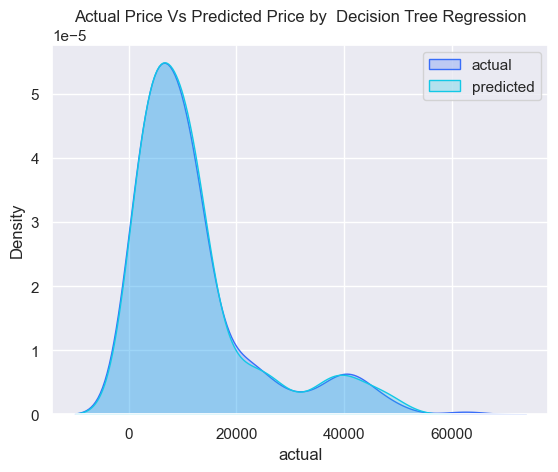

In [87]:
sns.set_palette('rainbow')
sns.kdeplot(data=dtr_prediction, x='actual', label='actual', fill=True)
sns.kdeplot(data=dtr_prediction, x='predicted', label='predicted', fill=True)
plt.title("Actual Price Vs Predicted Price by  Decision Tree Regression")
plt.legend()
plt.show()

### *Random Forest Regression* 

In [88]:
rf_score = r2_score(Y_test, rf_y_pred)
rf_mae = mean_absolute_error(Y_test, rf_y_pred)

In [89]:
print("Random Forest Regressor Training score: {:.2f}".format(rf.score(X_train, Y_train)))
print("Random Forest Regressor Test score: {:.2f}".format(rf.score(X_test, Y_test)))
print("R2 score: {:.2f}".format(r2_score(Y_test, rf_y_pred)))
print("MSE: {:.2f}".format(mean_squared_error(Y_test, rf_y_pred)))
print("MAE: {:.2f}".format(mean_absolute_error(Y_test, rf_y_pred)))

Random Forest Regressor Training score: 0.97
Random Forest Regressor Test score: 0.82
R2 score: 0.82
MSE: 23508423.16
MAE: 2769.44


In [90]:
rf_prediction = pd.DataFrame({'actual':Y_test, 'predicted':rf_y_pred.flatten()})

In [91]:
rf_prediction.head()

,actual,predicted
629,42983.46,47649.15530
1087,11353.23,12080.68910
283,11879.10,17964.59446
790,5662.23,11296.38370
594,5709.16,8104.96440


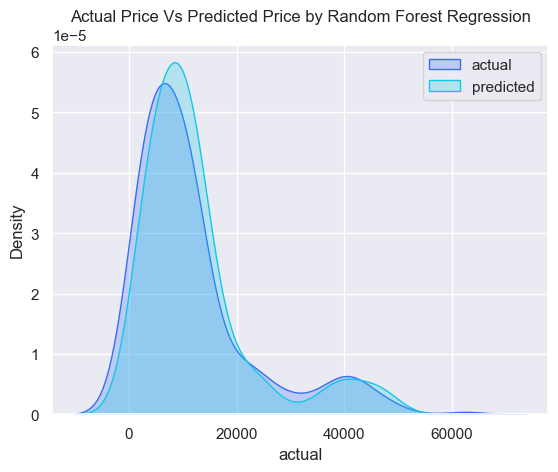

In [92]:
sns.set_palette('rainbow')
sns.kdeplot(data=rf_prediction, x='actual', label='actual', fill=True)
sns.kdeplot(data=rf_prediction, x='predicted', label='predicted', fill=True)
plt.title("Actual Price Vs Predicted Price by Random Forest Regression")
plt.legend()
plt.show()

### *XG Boost*

In [93]:
xgb_score = r2_score(Y_test, xgb_y_pred)
xgb_mae = mean_absolute_error(Y_test, xgb_y_pred)

In [94]:
print("XG Boost Training score: {:.2f}".format(xgb.score(X_train, Y_train)))
print("XG Boost Test score: {:.2f}".format(xgb.score(X_test, Y_test)))
print("R2 score: {:.2f}".format(r2_score(Y_test, xgb_y_pred)))
print("MSE: {:.2f}".format(mean_squared_error(Y_test, xgb_y_pred)))
print("MAE: {:.2f}".format(mean_absolute_error(Y_test, xgb_y_pred)))

XG Boost Training score: 0.98
XG Boost Test score: 0.81
R2 score: 0.81
MSE: 24155280.25
MAE: 2803.41


In [95]:
xgb_prediction = pd.DataFrame({'actual':Y_test, 'predicted':xgb_y_pred.flatten()})

In [96]:
xgb_prediction.head()

,actual,predicted
629,42983.46,44012.398438
1087,11353.23,10768.996094
283,11879.10,18738.666016
790,5662.23,7259.727539
594,5709.16,6252.019531


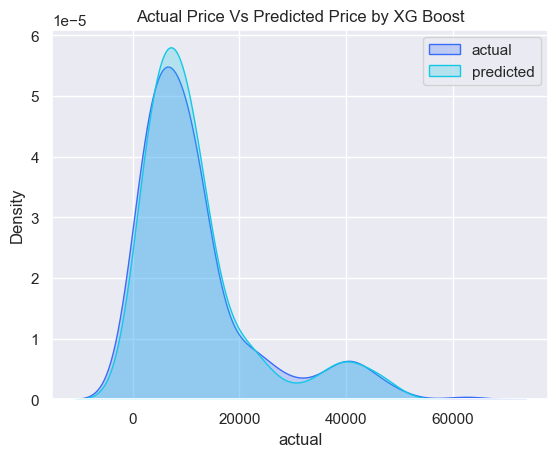

In [97]:
sns.set_palette('rainbow')
sns.kdeplot(data=xgb_prediction, x='actual', label='actual', fill=True)
sns.kdeplot(data=xgb_prediction, x='predicted', label='predicted', fill=True)
plt.title("Actual Price Vs Predicted Price by XG Boost")
plt.legend()
plt.show()

## *Model Evaluation*

In [98]:
from sklearn.model_selection import cross_val_score
lr_cv_scores = cross_val_score(lr,X_train,Y_train,cv=5)
lr_cross_score = np.mean(lr_cv_scores)
print(f"Mean Cross-Validation: {lr_cross_score:.2f}")

Mean Cross-Validation: 0.74


In [99]:
knn_cv_scores = cross_val_score(knn,X_train,Y_train,cv=5)
knn_cross_score = np.mean(knn_cv_scores)
print(f"Mean Cross-Validation: {knn_cross_score:.2f}")

Mean Cross-Validation: 0.82


In [100]:
dtr_cv_scores = cross_val_score(dtr,X_train,Y_train,cv=5)
dtr_cross_score = np.mean(dtr_cv_scores)
print(f"Mean Cross-Validation: {dtr_cross_score:.2f}")

Mean Cross-Validation: 0.68


In [101]:
rf_cv_scores = cross_val_score(rf,X_train,Y_train,cv=5)
rf_cross_score = np.mean(rf_cv_scores)
print(f"Mean Cross-Validation: {rf_cross_score:.2f}")

Mean Cross-Validation: 0.80


In [102]:
xgb_cv_scores = cross_val_score(xgb,X_train,Y_train,cv=5)
xgb_cross_score = np.mean(xgb_cv_scores)
print(f"Mean Cross-Validation: {xgb_cross_score:.2f}")

Mean Cross-Validation: 0.76


In [103]:
models_df = pd.DataFrame({
    '     Model   ': "Linear KNN Decision_Tree Random_Forest XG_boost".split(),
    '   R2_score  ': [lr_score,knn_score, dtr_score, rf_score,xgb_score],
    '      MAE    ': [lr_mae, knn_mae, dtr_mae, rf_mae,xgb_mae],
    ' Cross_valid ': [lr_cross_score,knn_cross_score,dtr_cross_score,rf_cross_score,xgb_cross_score]
})

models_df

,Model,R2_score,MAE,Cross_valid
0,Linear,0.733804,4006.988373,0.740064
1,KNN,0.825048,2712.942134,0.820847
2,Decision_Tree,0.748880,2844.266269,0.675605
3,Random_Forest,0.818271,2769.442137,0.801464
4,XG_boost,0.813271,2803.414255,0.764644


In [104]:
print(models_df.columns)

Index(['     Model   ', '   R2_score  ', '      MAE    ', ' Cross_valid '], dtype='object')


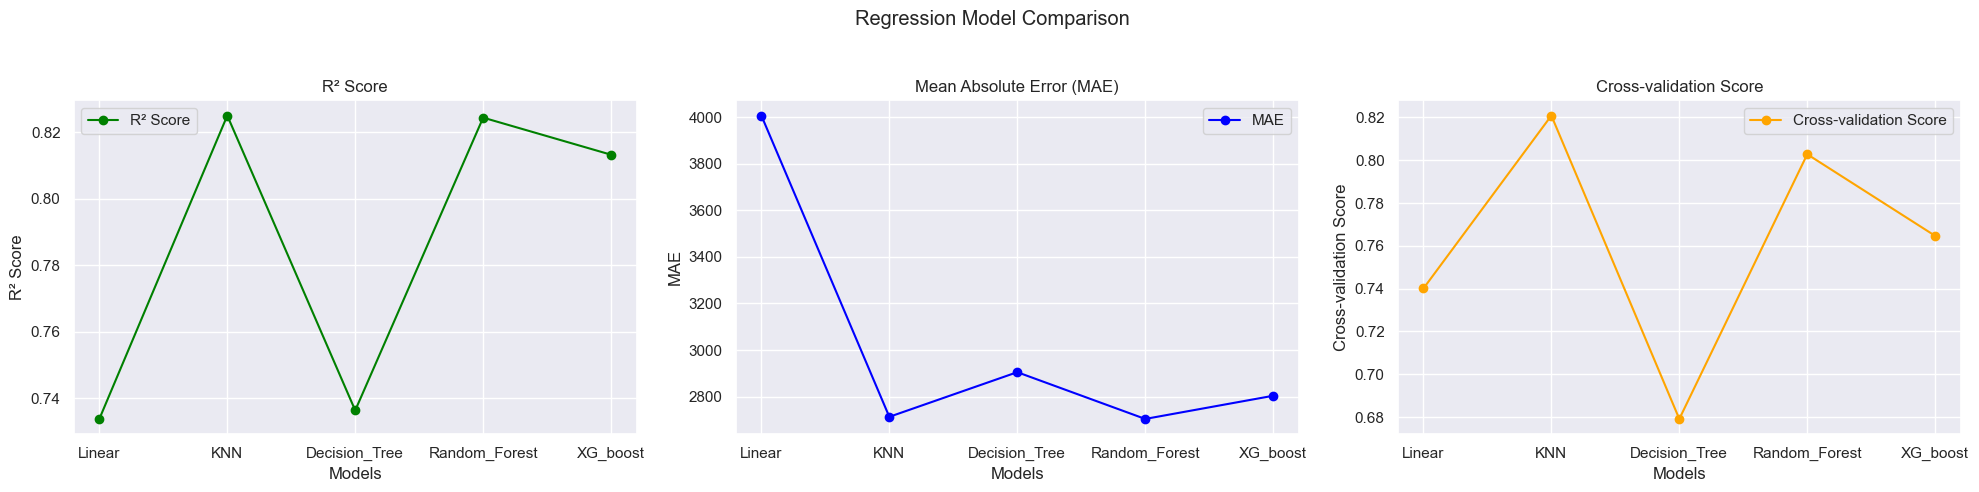

In [105]:
# Sample DataFrame with your provided data
data = {
    'Model': ['Linear', 'KNN', 'Decision_Tree', 'Random_Forest', 'XG_boost'],
    'R2_score': [0.733804, 0.825048, 0.736373, 0.824427, 0.813271],
    'MAE': [4006.988373, 2712.942134, 2904.748209, 2703.862450, 2803.414255],
    'Cross_valid': [0.740064, 0.820847, 0.679118, 0.802773, 0.764644]
}
models_df = pd.DataFrame(data)

# Create subplots
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(20, 5))
fig.suptitle("Regression Model Comparison")

# Plot R² scores
ax[0].plot(models_df['Model'], models_df['R2_score'], marker='o', color='green', label='R² Score')
ax[0].set_title("R² Score")
ax[0].set_xlabel("Models")
ax[0].set_ylabel("R² Score")
ax[0].grid(True)
ax[0].legend()

# Plot MAE
ax[1].plot(models_df['Model'], models_df['MAE'], marker='o', color='blue', label='MAE')
ax[1].set_title("Mean Absolute Error (MAE)")
ax[1].set_xlabel("Models")
ax[1].set_ylabel("MAE")
ax[1].grid(True)
ax[1].legend()

# Plot Cross-validation scores
ax[2].plot(models_df['Model'], models_df['Cross_valid'], marker='o', color='orange', label='Cross-validation Score')
ax[2].set_title("Cross-validation Score")
ax[2].set_xlabel("Models")
ax[2].set_ylabel("Cross-validation Score")
ax[2].grid(True)
ax[2].legend()

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Leave space for the suptitle

# Show the plots
plt.show()


In [106]:
df1.head()

,age,bmi,smoker,expenses
0,19,27.9,1,16884.92
1,18,33.8,0,1725.55
2,28,33.0,0,4449.46
3,33,22.7,0,21984.47
4,32,28.9,0,3866.86


## *Final Function*

In [107]:
def predict(rf):
    try:
        age = int(input("Enter age (whole number only): "))
        bmi = float(input("Enter BMI (float): "))
        smoker = int(input("Are you a smoker? (yes: 1, no: 0): "))

        # Validate smoker input
        if smoker not in [0, 1]:
            raise ValueError("Smoker input must be 0 or 1.")

        # Prepare the input data
        data = np.array([[age, bmi, smoker]])
        my_prediction = rf.predict(data)
        next_prediciton = knn.predict(data)

        prediction_text = 'Insurance Premium is {} Rs'.format(my_prediction[0])
        prediction_text = 'Insurance Premium is {} Rs'.format(my_prediction[0])
        return prediction_text

    except ValueError as e:
        return f"Input error: {e}"
    except Exception as e:
        return f"An unexpected error occurred: {e}"

In [108]:
# You have to pass the rf function for running.
# print(predict(rf))